# MNISTで畳み込みニューラルネットワーク(CNN)を実装

まず、「画像認識①」と同様に、データを準備しましょう

In [1]:
import numpy as np    
import matplotlib.pyplot as plt

np.set_printoptions(suppress = True)

from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## データの準備

- 正規化（0～255 → 0～1）
- 「0～9」のラベルをOne-Hotに変換

In [2]:
from keras.utils import to_categorical

def prepare_dataset(x, y):
    
    # 今回は、1次元にする必要はない！
    
    # 正規化
    x = x / 255
    
    # One-Hot エンコーディング
    y = to_categorical(y)
    
    return x, y

# 学習と検証データを用意
x_train_p, y_train_p = prepare_dataset(x_train, y_train)
x_test_p, y_test_p = prepare_dataset(x_test, y_test)

## モデルを構築

モデルを更新し、中間の「Dense」の代わりに、畳み込み（Convolution)を使う

In [3]:
from keras.layers import Input, Conv2D, Flatten, Dense
from keras.models import Model

def create_model():
    
    x = Input(shape=(28,28,1), dtype=float)
    h = Conv2D(16, (3, 3), activation="relu")(x)
    f = Flatten()(h)
    y = Dense(10, activation="softmax")(f) 
    
    model = Model(inputs=x, outputs=y)

    return model

model = create_model()
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                108170    
Total params: 108,330
Trainable params: 108,330
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
model.fit(x_train_p, y_train_p, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2016 - accuracy: 0.9426
Epoch 2/6
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0776 - accuracy: 0.9774
Epoch 3/6
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0577 - accuracy: 0.9823
Epoch 4/6
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0454 - accuracy: 0.9859
Epoch 5/6
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0375 - accuracy: 0.9888
Epoch 6/6
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0301 - accuracy: 0.9906


## 結果確認
先ほど使った関数をコピーして…

In [5]:
# 結果を表示する
def display_result(x_test, y_test, y_pred):

    # AIの出力（信頼）
    max_idx = np.argmax(y_pred)
    confidence = y_pred[max_idx] * 100
    print('認識: %d (%.2f%%) - 正解：%d'%(max_idx, confidence, y_test))
    
    # 入力画像
    plt.imshow(x_test, cmap="gray")
    plt.show()

認識: 7 (100.00%) - 正解：7


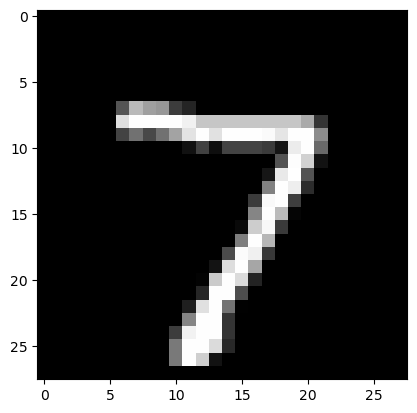

認識: 2 (100.00%) - 正解：2


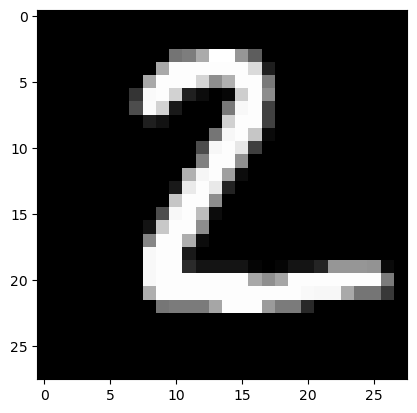

認識: 1 (99.83%) - 正解：1


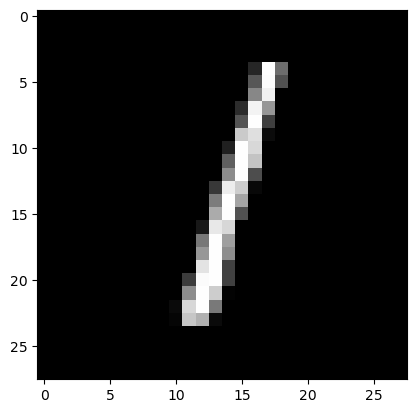

認識: 0 (100.00%) - 正解：0


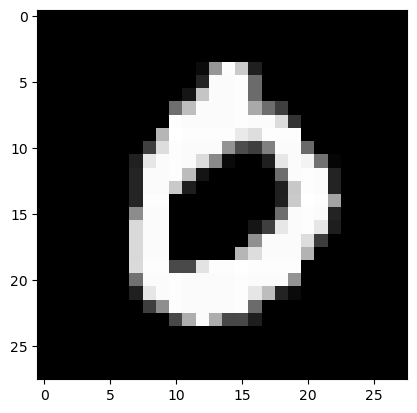

認識: 4 (100.00%) - 正解：4


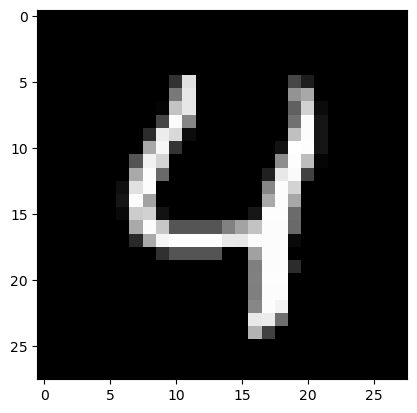

認識: 1 (99.96%) - 正解：1


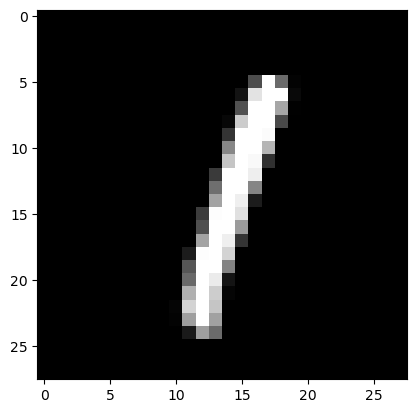

認識: 4 (99.69%) - 正解：4


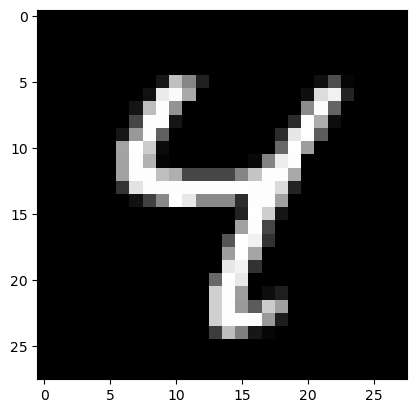

認識: 9 (99.47%) - 正解：9


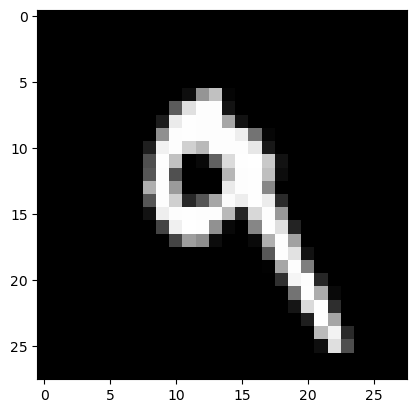

認識: 5 (88.88%) - 正解：5


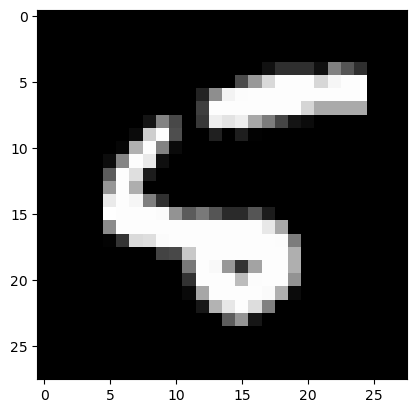

認識: 9 (99.82%) - 正解：9


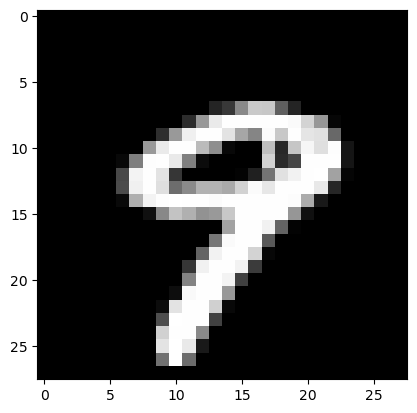

認識: 0 (100.00%) - 正解：0


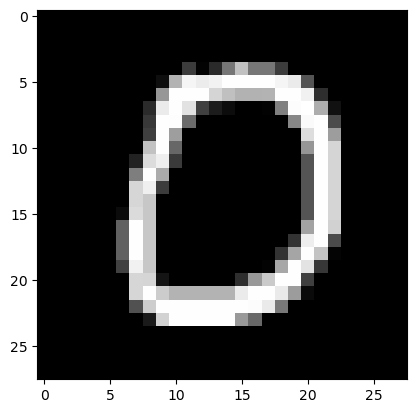

認識: 6 (100.00%) - 正解：6


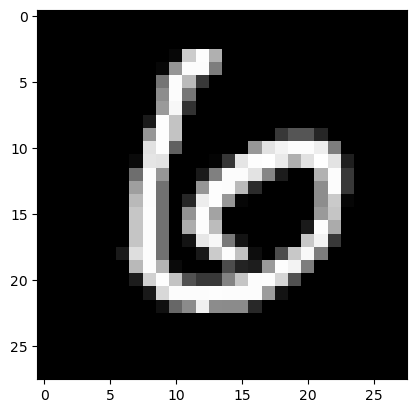

認識: 9 (99.96%) - 正解：9


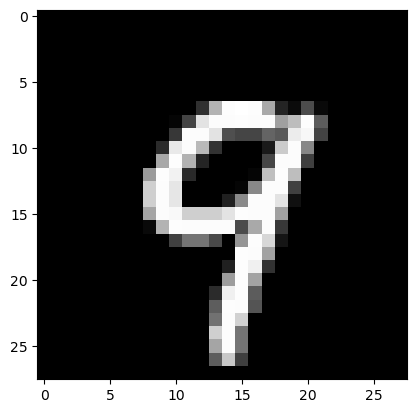

認識: 0 (100.00%) - 正解：0


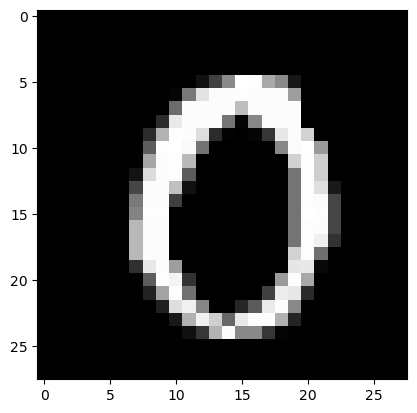

認識: 1 (99.97%) - 正解：1


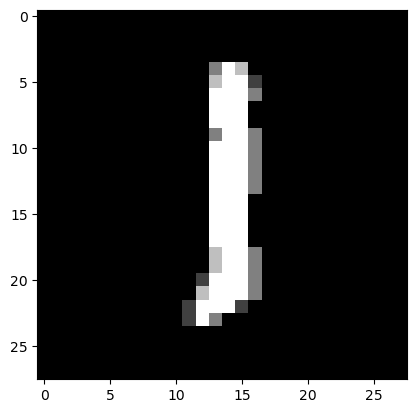

認識: 5 (100.00%) - 正解：5


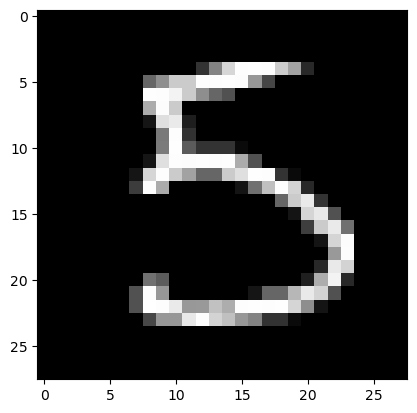

認識: 9 (99.99%) - 正解：9


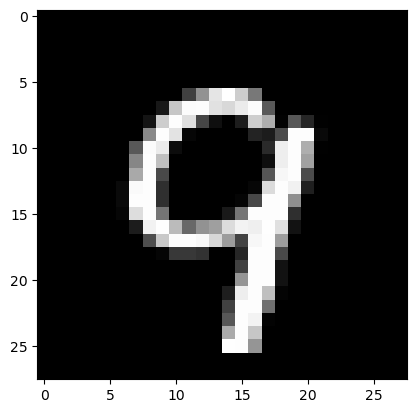

認識: 7 (100.00%) - 正解：7


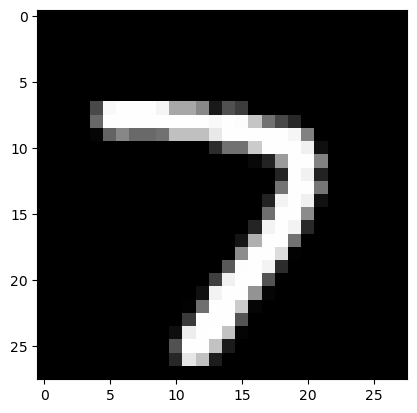

認識: 3 (84.84%) - 正解：3


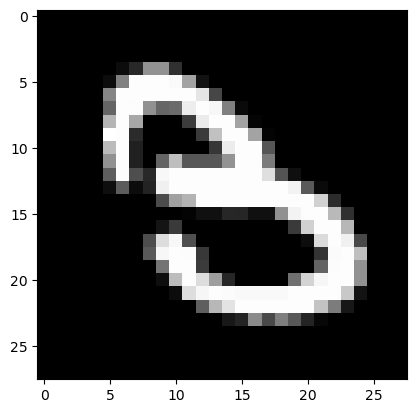

認識: 4 (100.00%) - 正解：4


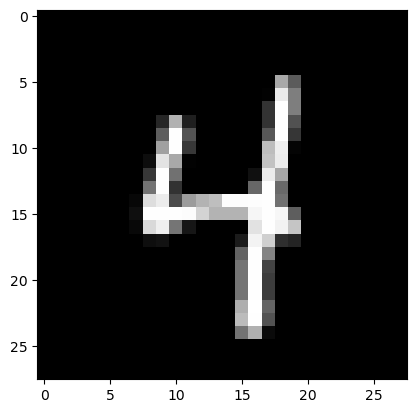

認識: 9 (99.84%) - 正解：9


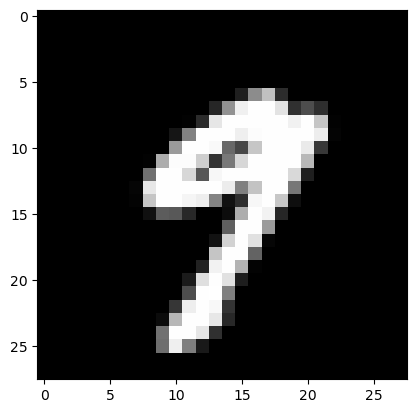

認識: 6 (100.00%) - 正解：6


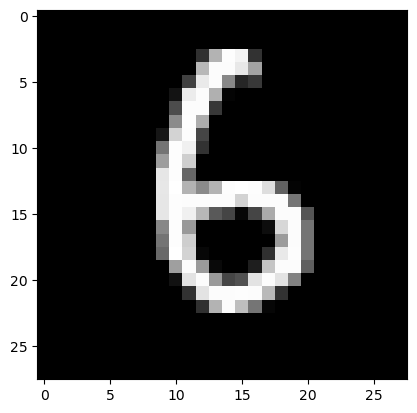

認識: 6 (99.96%) - 正解：6


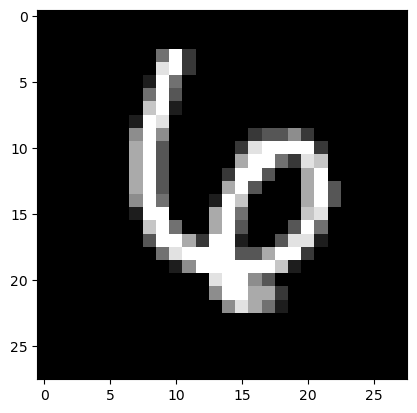

認識: 5 (100.00%) - 正解：5


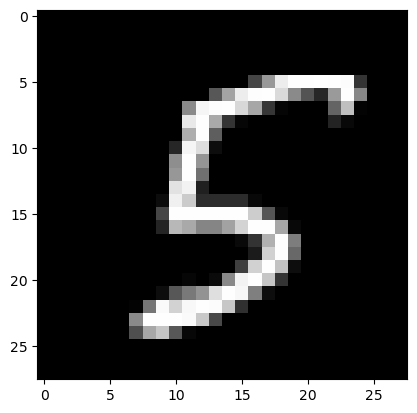

認識: 4 (99.99%) - 正解：4


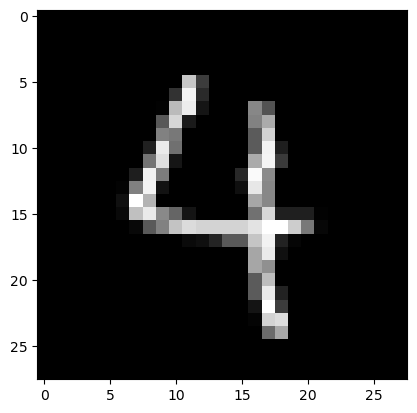

認識: 0 (100.00%) - 正解：0


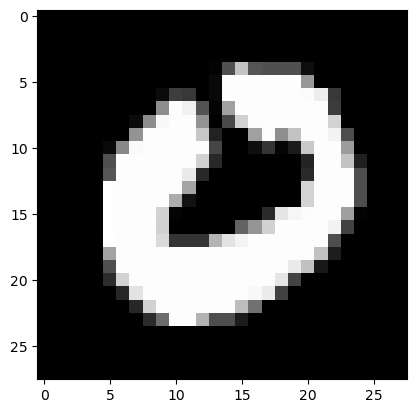

認識: 7 (99.99%) - 正解：7


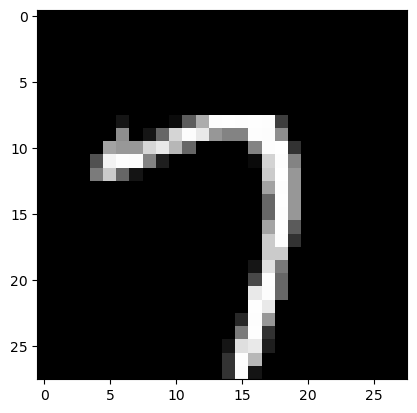

認識: 4 (100.00%) - 正解：4


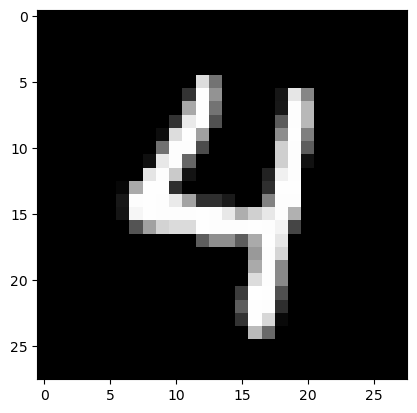

認識: 0 (100.00%) - 正解：0


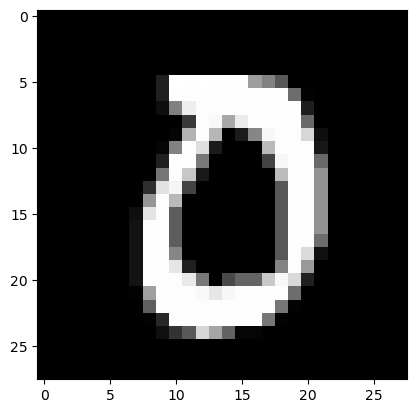

認識: 1 (99.91%) - 正解：1


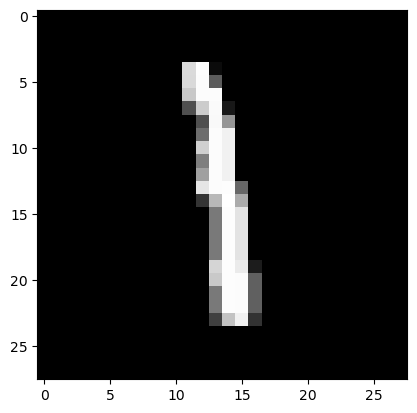

認識: 3 (100.00%) - 正解：3


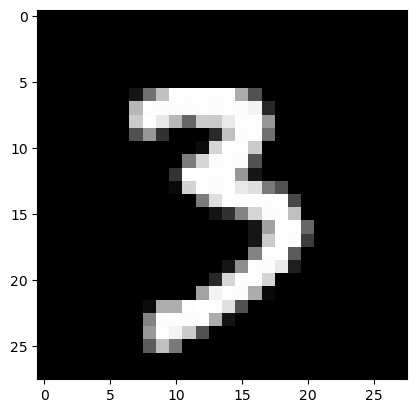

認識: 1 (99.75%) - 正解：1


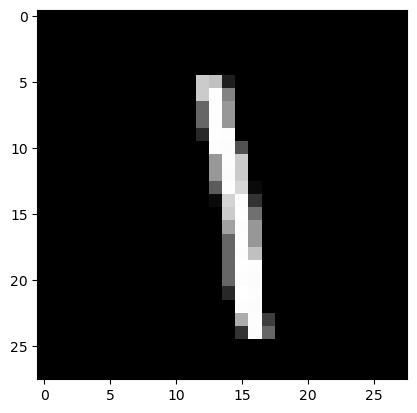

認識: 3 (100.00%) - 正解：3


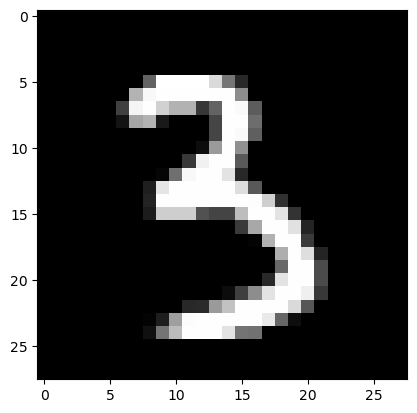

認識: 4 (99.33%) - 正解：4


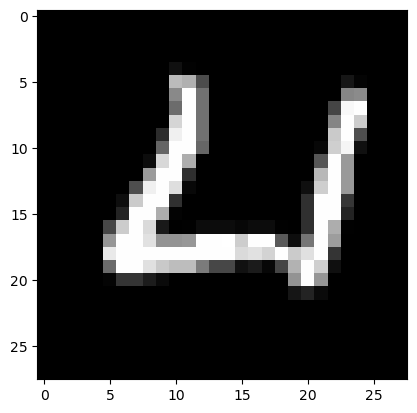

認識: 7 (100.00%) - 正解：7


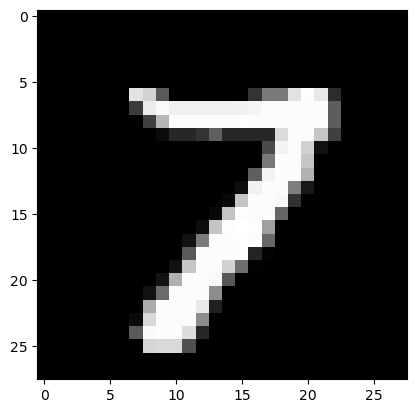

認識: 2 (100.00%) - 正解：2


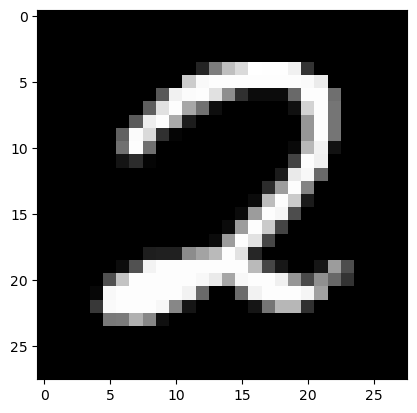

認識: 7 (99.99%) - 正解：7


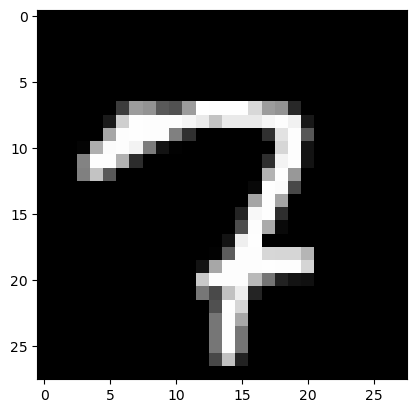

認識: 1 (99.97%) - 正解：1


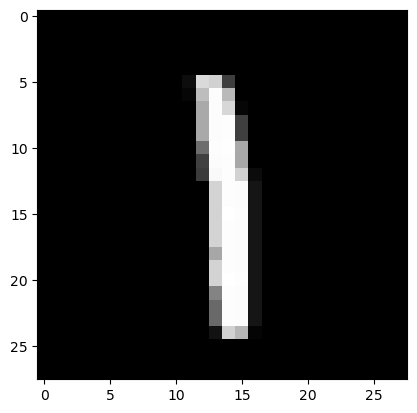

認識: 2 (100.00%) - 正解：2


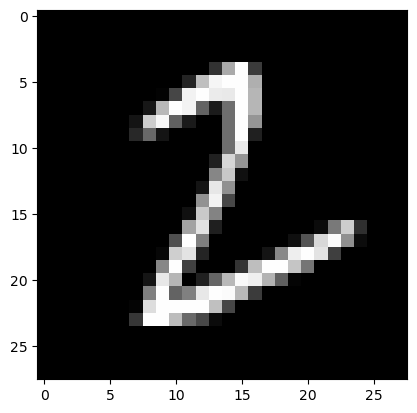

認識: 1 (99.90%) - 正解：1


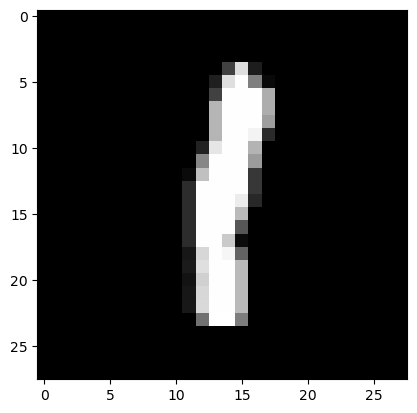

認識: 1 (99.97%) - 正解：1


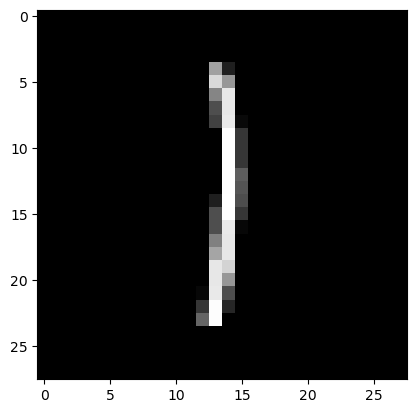

認識: 7 (99.98%) - 正解：7


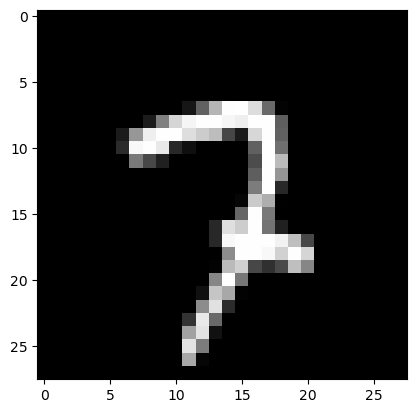

認識: 4 (99.99%) - 正解：4


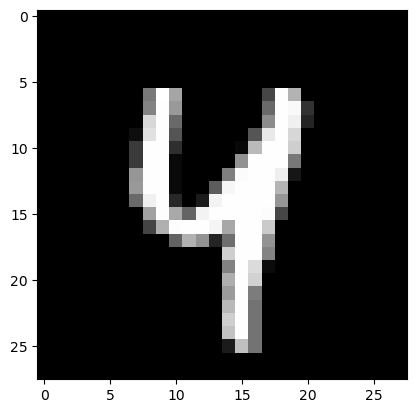

認識: 2 (99.94%) - 正解：2


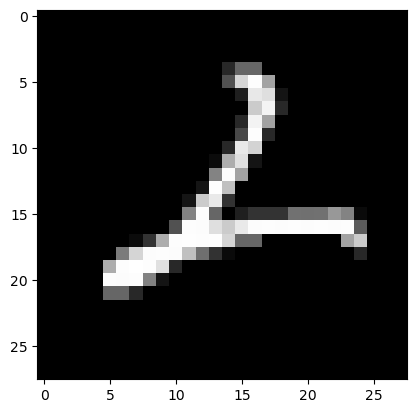

認識: 3 (99.98%) - 正解：3


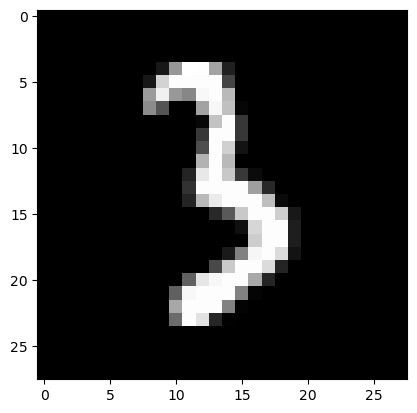

認識: 5 (99.98%) - 正解：5


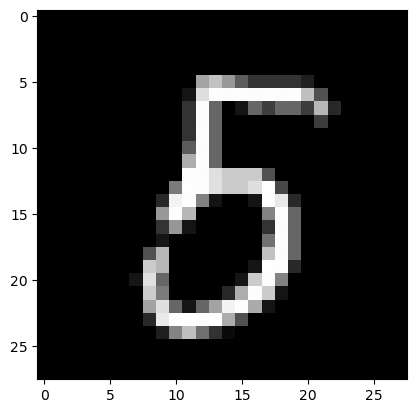

認識: 1 (99.96%) - 正解：1


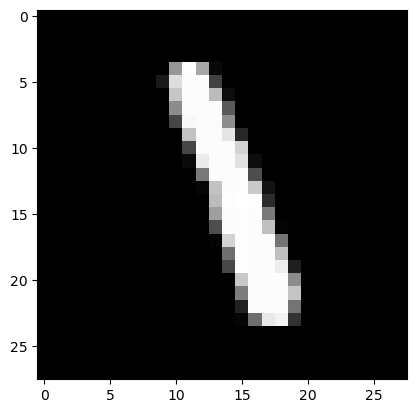

認識: 2 (100.00%) - 正解：2


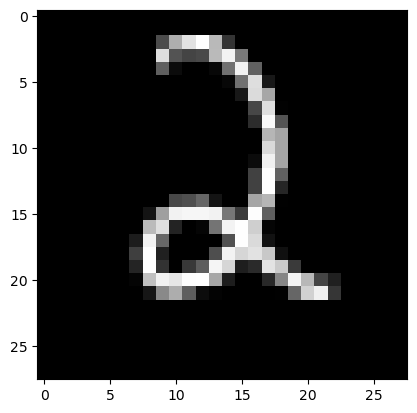

認識: 4 (100.00%) - 正解：4


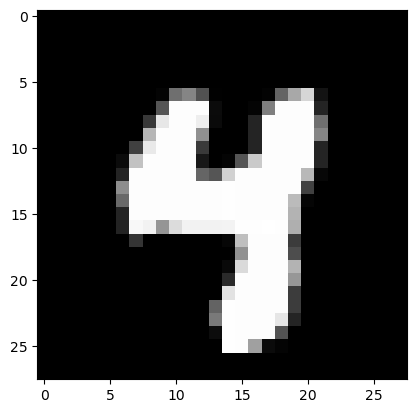

認識: 4 (100.00%) - 正解：4


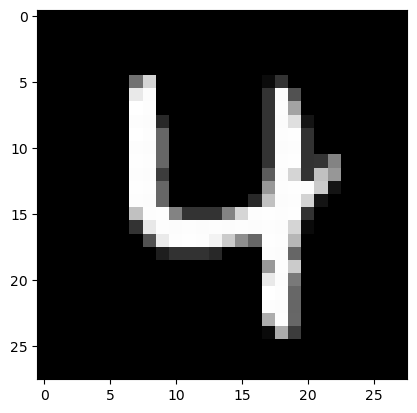

認識: 6 (100.00%) - 正解：6


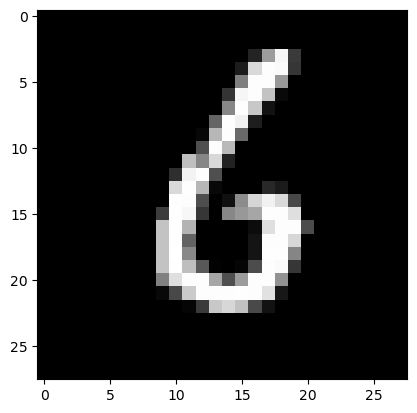

認識: 3 (100.00%) - 正解：3


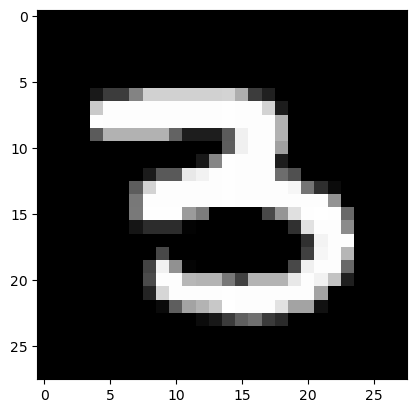

認識: 5 (100.00%) - 正解：5


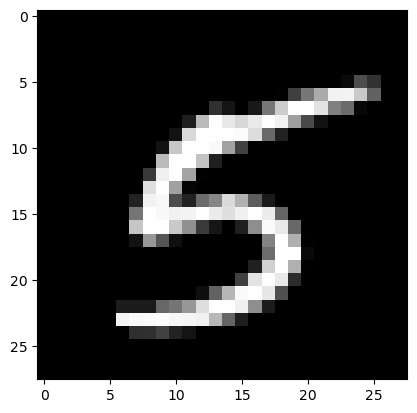

認識: 5 (99.99%) - 正解：5


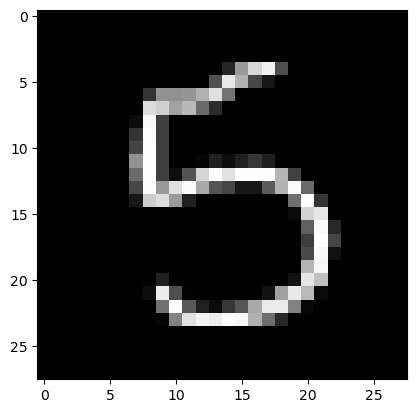

認識: 6 (100.00%) - 正解：6


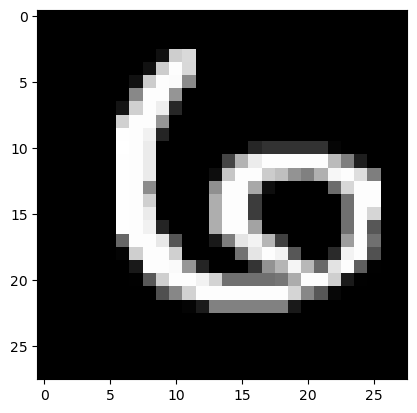

認識: 0 (100.00%) - 正解：0


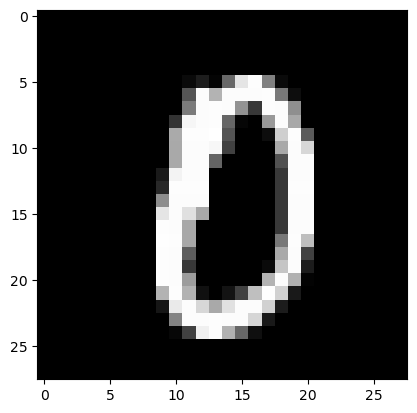

認識: 4 (100.00%) - 正解：4


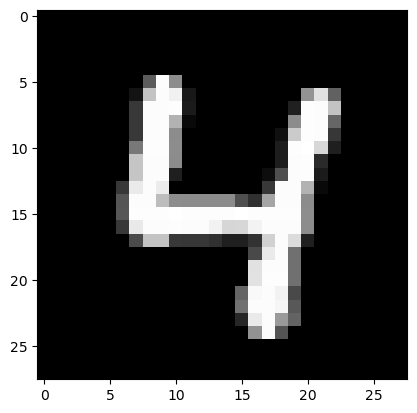

認識: 1 (99.83%) - 正解：1


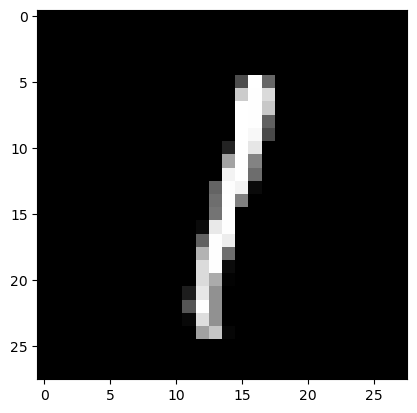

認識: 9 (100.00%) - 正解：9


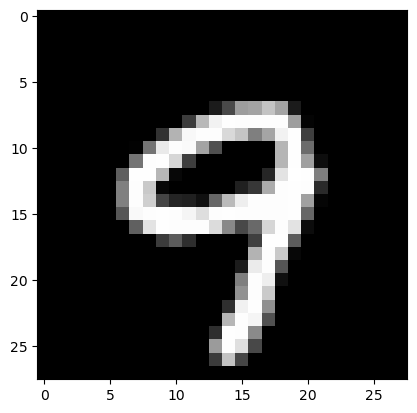

認識: 5 (96.16%) - 正解：5


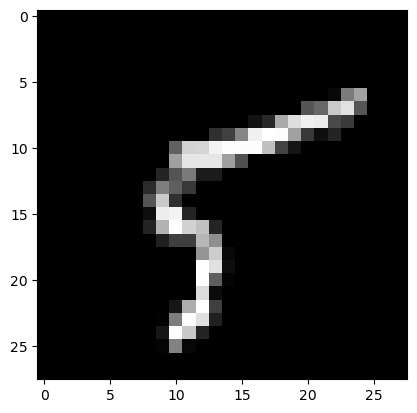

認識: 7 (100.00%) - 正解：7


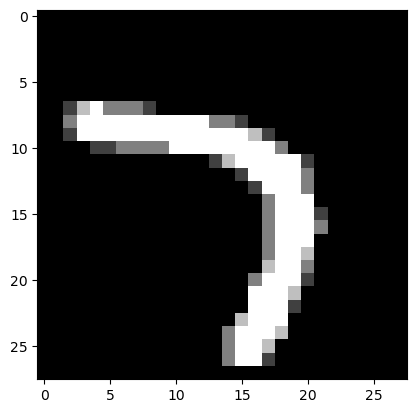

認識: 8 (99.95%) - 正解：8


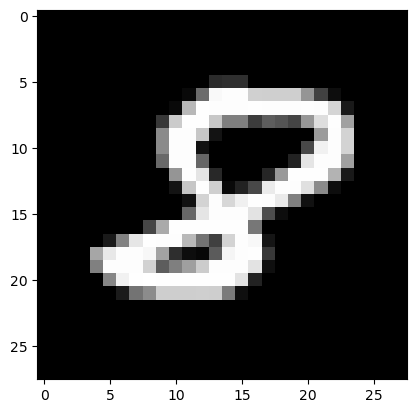

認識: 5 (78.32%) - 正解：9


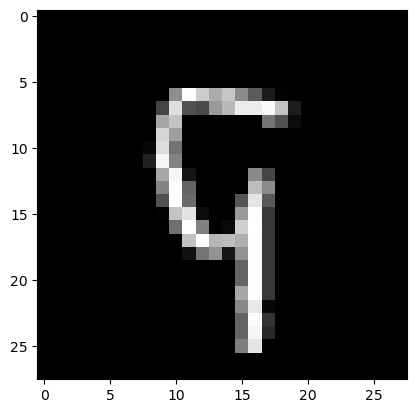

認識: 3 (88.51%) - 正解：3


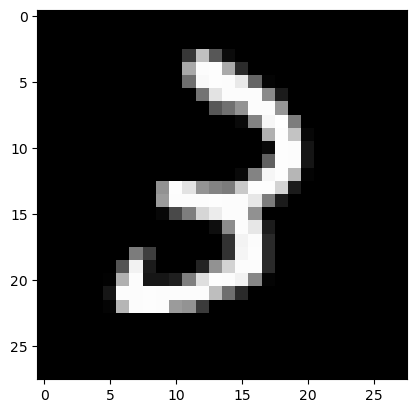

認識: 7 (100.00%) - 正解：7


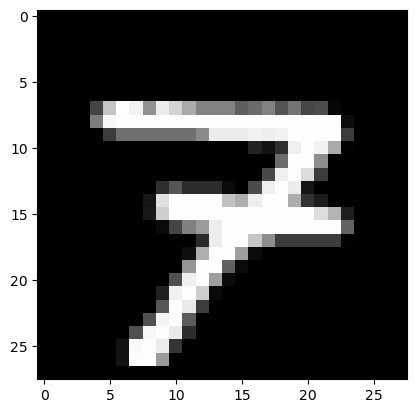

認識: 4 (99.96%) - 正解：4


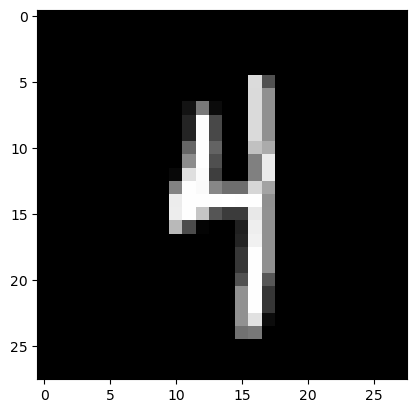

認識: 6 (99.16%) - 正解：6


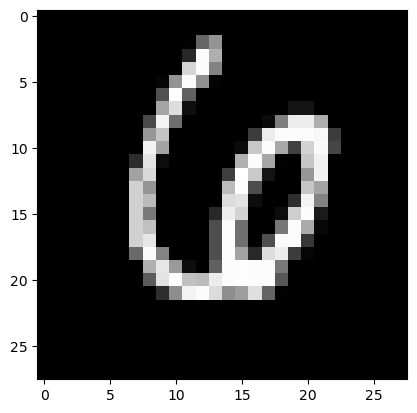

認識: 4 (100.00%) - 正解：4


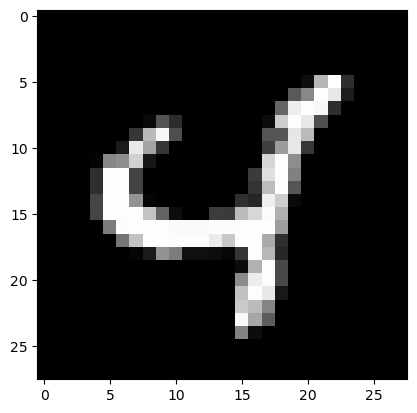

認識: 3 (100.00%) - 正解：3


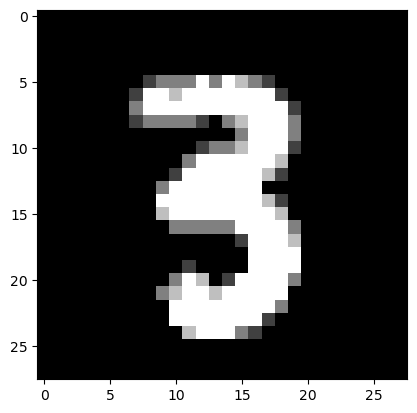

認識: 0 (100.00%) - 正解：0


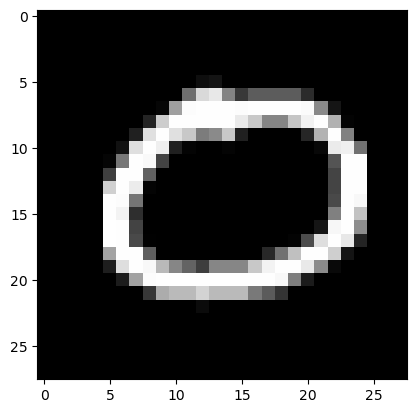

認識: 7 (100.00%) - 正解：7


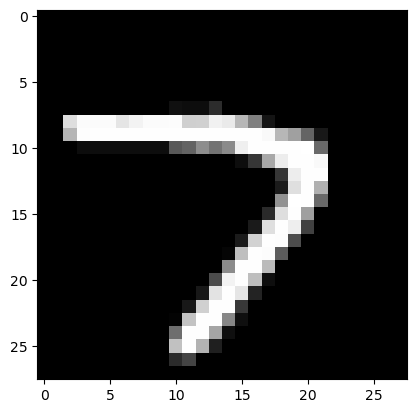

認識: 0 (100.00%) - 正解：0


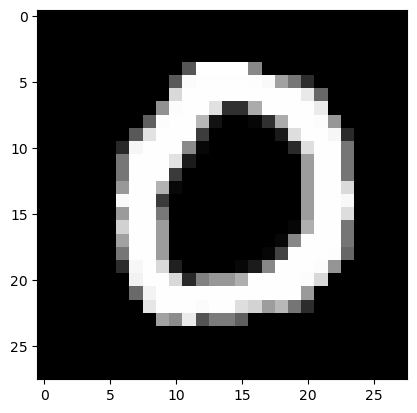

認識: 2 (99.08%) - 正解：2


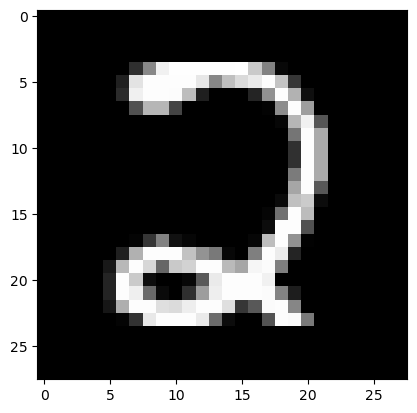

認識: 9 (97.86%) - 正解：9


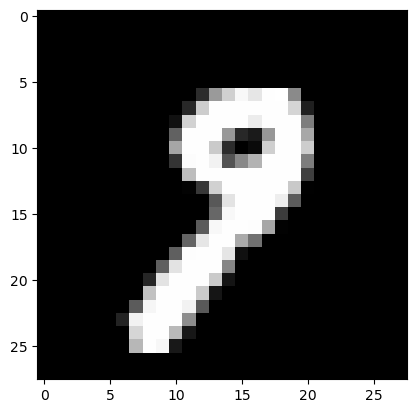

認識: 1 (99.92%) - 正解：1


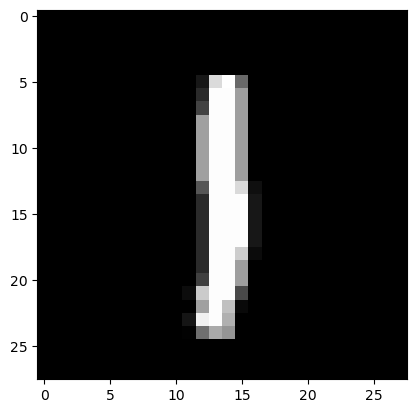

認識: 7 (100.00%) - 正解：7


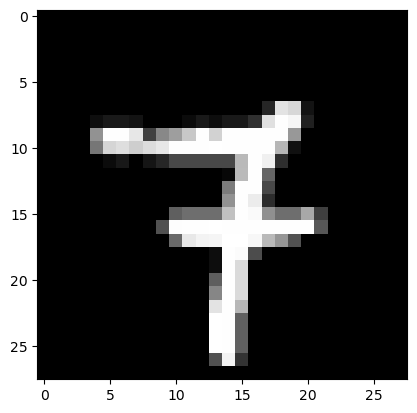

認識: 3 (99.98%) - 正解：3


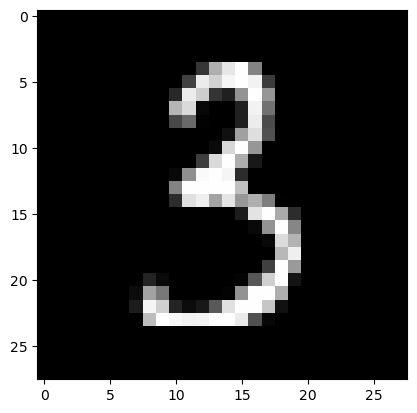

認識: 2 (100.00%) - 正解：2


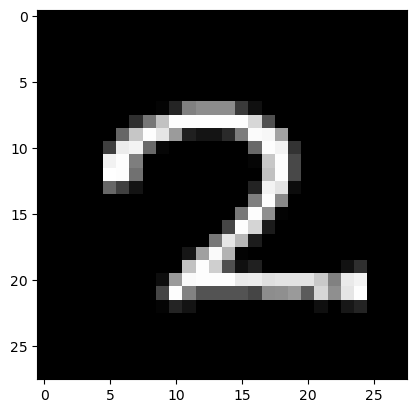

認識: 9 (95.63%) - 正解：9


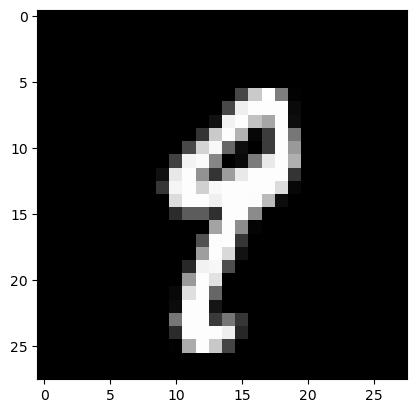

認識: 7 (99.99%) - 正解：7


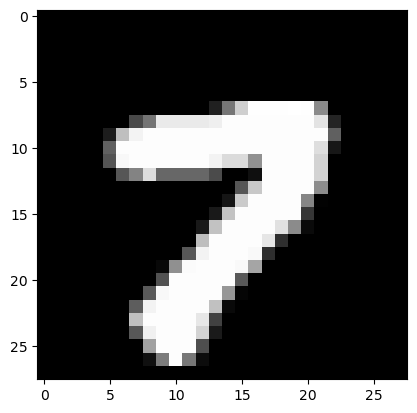

認識: 7 (99.61%) - 正解：7


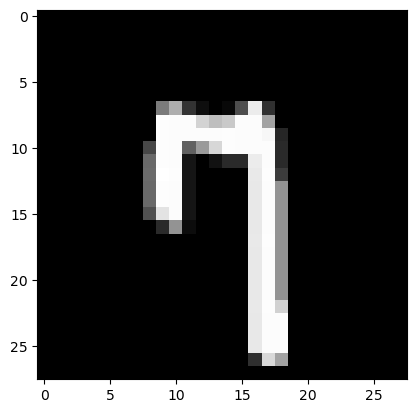

認識: 6 (100.00%) - 正解：6


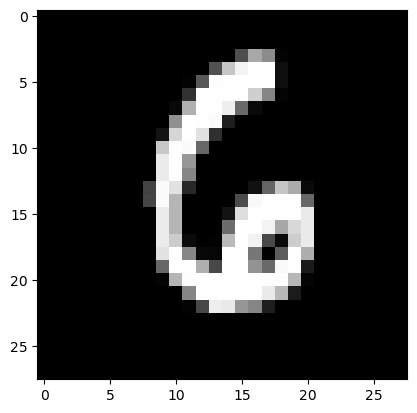

認識: 2 (100.00%) - 正解：2


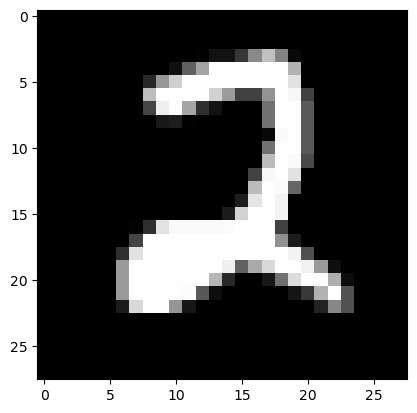

認識: 7 (100.00%) - 正解：7


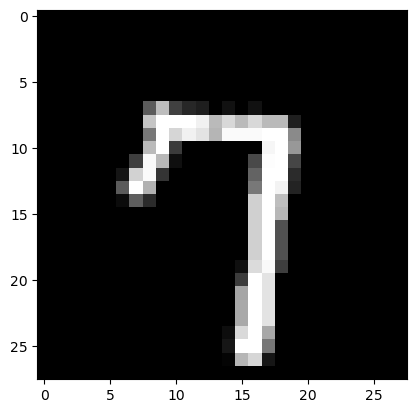

認識: 8 (100.00%) - 正解：8


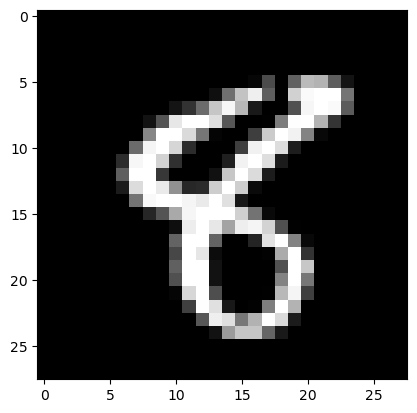

認識: 4 (100.00%) - 正解：4


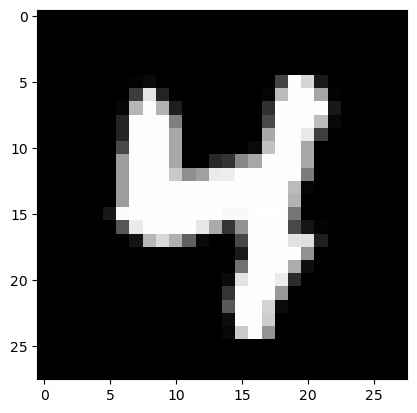

認識: 7 (99.99%) - 正解：7


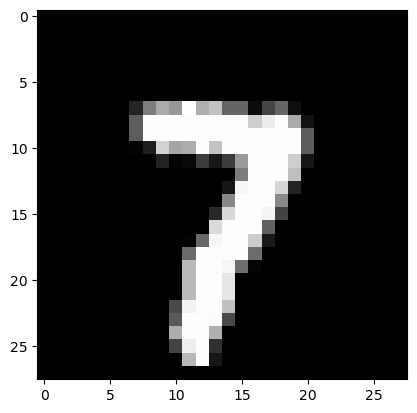

認識: 3 (99.73%) - 正解：3


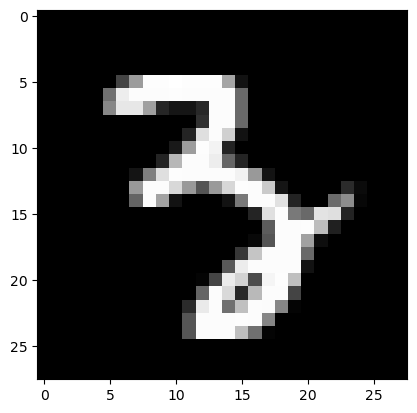

認識: 6 (100.00%) - 正解：6


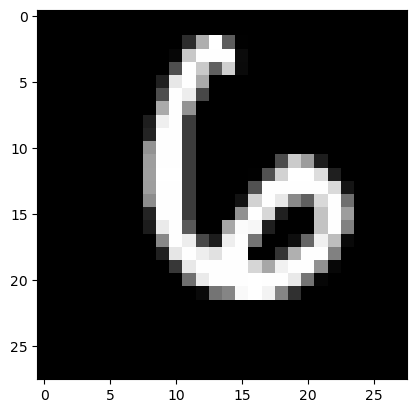

認識: 1 (99.90%) - 正解：1


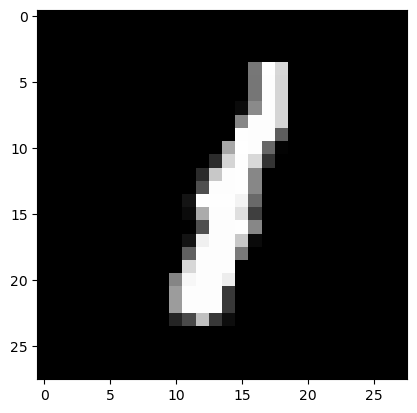

認識: 3 (99.99%) - 正解：3


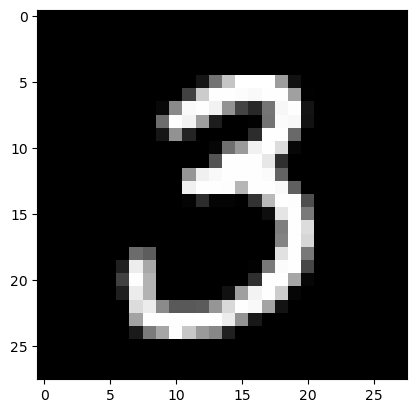

認識: 6 (100.00%) - 正解：6


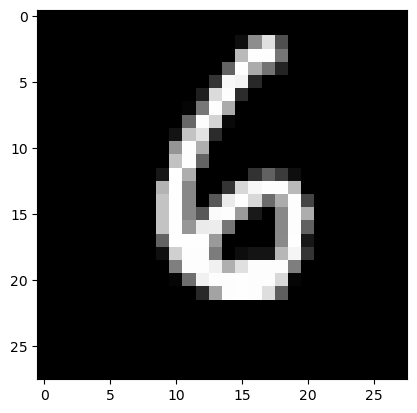

認識: 9 (98.14%) - 正解：9


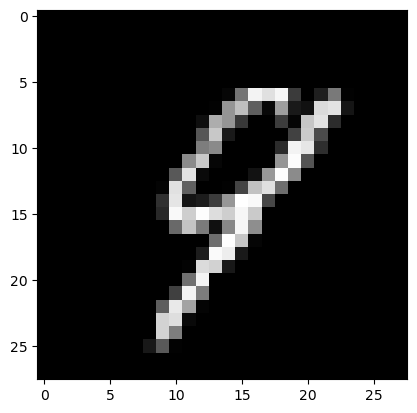

認識: 3 (99.80%) - 正解：3


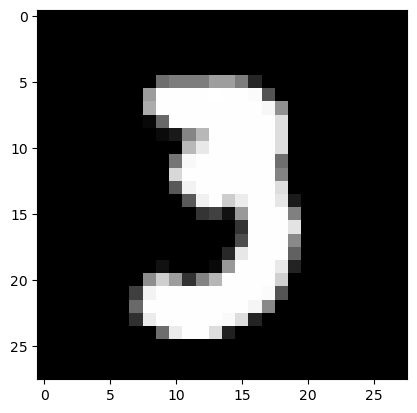

認識: 1 (99.89%) - 正解：1


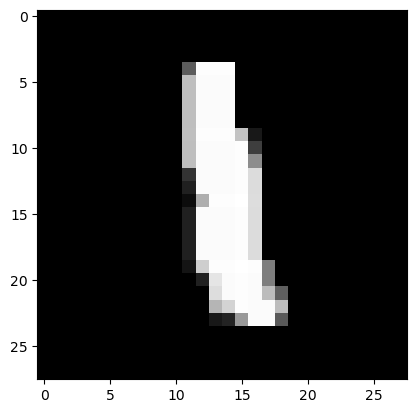

認識: 4 (99.98%) - 正解：4


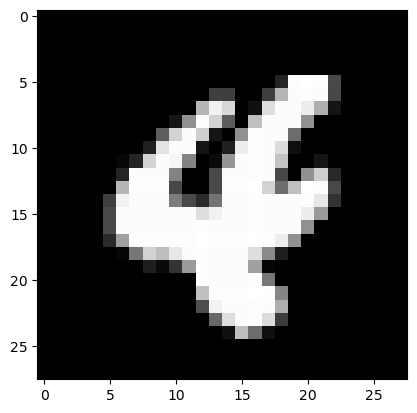

認識: 1 (81.60%) - 正解：1


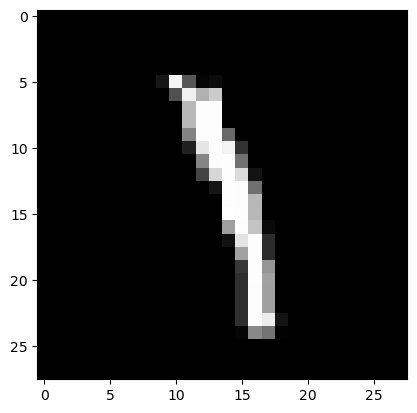

認識: 7 (99.98%) - 正解：7


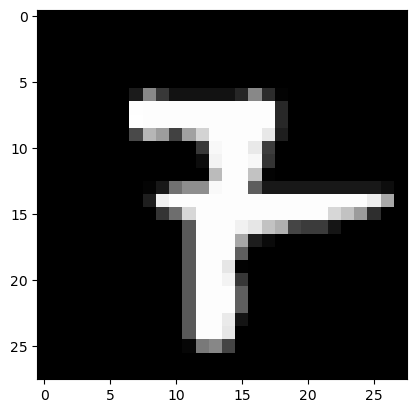

認識: 6 (99.94%) - 正解：6


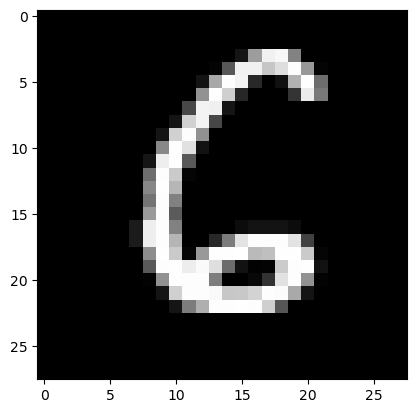

認識: 9 (100.00%) - 正解：9


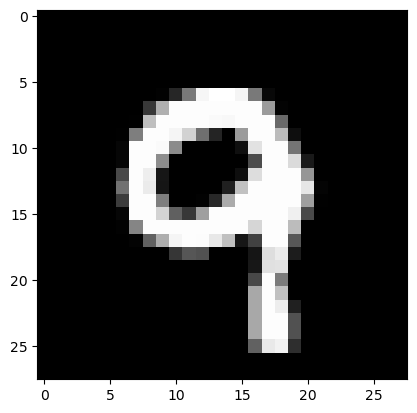

In [6]:
y_pred = model.predict(x_test_p)

for i in range(100):
    display_result(x_test[i], y_test[i], y_pred[i])

In [7]:
model.evaluate(x_test_p, y_test_p)

313/313 [==============================] - 1s 3ms/step - loss: 0.0639 - accuracy: 0.9793


[0.06385339796543121, 0.9793000221252441]

## 考える課題
中間に畳み込みレイヤを増やせまどうなる？精度が良くなる？